<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"></ul></div>

In [1]:
import starcoder42 as s
import PSG
import glob
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [7]:
gcmfiles = glob.glob('*terminator.txt')
print (gcmfiles)

['trappist1e_1barN2_0.4barCO2_aqua_terminator.txt']


In [12]:
transit = PSG.PSG("TRAPPIST-1 e", gcmfiles[0], scope='MIRI-MRS', is_earth=False,
            atmosphere_ceiling=1e-6, n_uplayers=7, exposure_time=15,
            exposure_count=114)
transit.calculate(skprow=11)
transit.write()
occultation = PSG.PSG("TRAPPIST-1 e", gcmfiles[0], scope="MIRI-MRS",
                      is_earth=False, atmosphere_ceiling=1e-6, n_uplayers=7,
                      exposure_time=15, exposure_count=114, phase=0)
occultation.calculate(skprow=11)
occultation.write()
almost = PSG.PSG("TRAPPIST-1 e", gcmfiles[0], scope="MIRI-MRS",
                      is_earth=False, atmosphere_ceiling=1e-6, n_uplayers=7,
                      exposure_time=15, exposure_count=114, phase=175)
almost.calculate(skprow=11)
almost.write()

Calculating Planet Data
    Using terminator profile
    Successfully added 7 layers to the atmosphere
    Successfully created PSG Config file from GCM results for TRAPPIST-1 e
    The file's name is trappist1e_1barN2_0.4barCO2_psginput.txt
Calculating Planet Data
    Using substellar profile
    Successfully added 7 layers to the atmosphere
    Successfully created PSG Config file from GCM results for TRAPPIST-1 e
    The file's name is trappist1e_1barN2_0.4barCO2_0_psginput.txt
Calculating Planet Data
    Using antistellar profile
    Successfully added 7 layers to the atmosphere
    Successfully created PSG Config file from GCM results for TRAPPIST-1 e
    The file's name is trappist1e_1barN2_0.4barCO2_175_psginput.txt


In [13]:
transit.send(run=True)
transit.plot_setup()
occultation.send(run=True)
occultation.plot_setup()
almost.send(run=True)
almost.plot_setup()

Sending to PSG
    Successfully connected to NASA PSG
    7 files created
Ready to Make Plots
Sending to PSG
    Successfully connected to NASA PSG
    8 files created
    Exoplanet was not transitting
Ready to Make Plots
Sending to PSG
    Successfully connected to NASA PSG
    8 files created
    Exoplanet was not transitting
Ready to Make Plots


Text(0.5,1,'Transit Depth Without Noise\nTRAPPIST-1 e 1barN2 0.4barCO2')

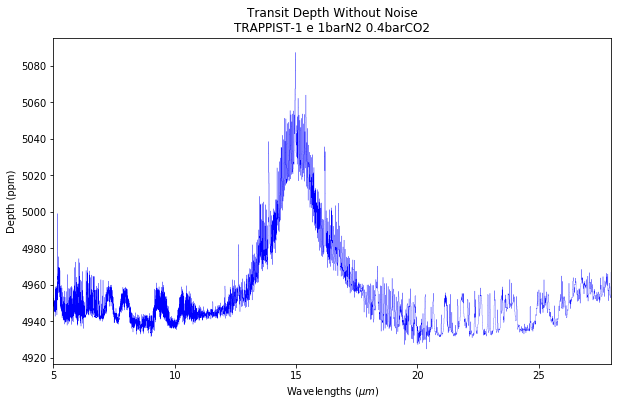

In [29]:
fig = plt.figure(figsize=(10, 6))
ax = fig.gca()
ax.step(transit.Wavelengths, 1e6*(almost.Total-transit.Total)/occultation.Total,
       linewidth=0.25, c="b")
ax.set_xlim(5, 28)
ax.set_xlabel("Wavelengths ($\mu m$)")
ax.set_ylabel("Depth (ppm)")
ax.set_title("Transit Depth Without Noise\n{}".format(
             transit._title_stem))